# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Reyhan Ezra Bimantara
- Email: pro.bimantara@gmail.com
- Id Dicoding: rrexzra

## Persiapan

| No. | Column | Description |
| --- | --- | --- |
| 1 | Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| 2 | Application mode | The method of application used by the student. (Categorical) ... |
| 3 | Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
| 4 | Course | The course taken by the student. (Categorical) ... |
| 5 | Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
| 6 | Previous qualification | The qualification obtained by the student before enrolling in higher education. (Categorical) ... |
| 7 | Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| 8 | Nacionality | The nationality of the student. (Categorical) ... |
| 9 | Mother's qualification | The qualification of the student's mother. (Categorical) ... |
| 10 | Father's qualification | The qualification of the student's father. (Categorical) ... |
| 11 | Mother's occupation | The occupation of the student's mother. (Categorical) ... |
| 12 | Father's occupation | The occupation of the student's father. (Categorical) ... |
| 13 | Admission grade | Admission grade (between 0 and 200) |
| 14 | Displaced | Whether the student is a displaced person. (Categorical) 1 – yes 0 – no |
| 15 | Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
| 16 | Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no |
| 17 | Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no |
| 18 | Gender | The gender of the student. (Categorical) 1 – male 0 – female |
| 19 | Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
| 20 | Age at enrollment | The age of the student at the time of enrollment. (Numerical) |
| 21 | International | Whether the student is an international student. (Categorical) 1 – yes 0 – no |
| 22 | Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| 23 | Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| 24 | Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| 25 | Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |


### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,confusion_matrix, precision_score,
    recall_score, roc_curve, roc_auc_score,
    classification_report, f1_score
)

import joblib

In [2]:
#Untuk mengakses Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Menyiapkan data yang akan diguankan

## Data Understanding

### Connect to Dataset

In [3]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'

students_df = pd.read_csv(url, sep=';')
students_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Dataset Dimension

In [4]:
students_df.shape

(4424, 37)

### Dataset Summary

In [5]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Handling Missing Values

In [6]:
#Pengecekan untuk nilai null
print(f'Jumlah Null Values : \n{(students_df.isnull() | students_df.isna() | students_df.empty).sum()}')

Jumlah Null Values : 
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment           

### Handling Duplicated Values

In [7]:
#Check duplicated data
print(f'Jumlah duplikat : {students_df.duplicated().sum()}')

Jumlah duplikat : 0


### Checking Object Column

In [8]:
students_df.select_dtypes(include='object').dtypes

,0
Status,object


### Checking Integer Column

In [9]:
students_df.select_dtypes(include='int64').dtypes

,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64
Mothers_occupation,int64


### Checking Float Column

In [10]:
students_df.select_dtypes(include='float64').dtypes

,0
Previous_qualification_grade,float64
Admission_grade,float64
Curricular_units_1st_sem_grade,float64
Curricular_units_2nd_sem_grade,float64
Unemployment_rate,float64
Inflation_rate,float64
GDP,float64


### Dataset Descriptive Statistics

In [11]:
students_df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Exploratory Data Analysis

### Status Distribution

In [12]:
students_df['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [13]:
students_df = students_df[students_df['Status'] != 'Enrolled']

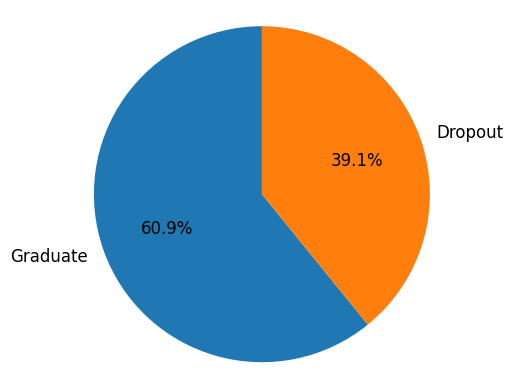

In [14]:
status_ct = students_df['Status'].value_counts()
labels = status_ct.index
values = status_ct.values

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.show()

In [15]:
students_df['Status']=students_df['Status'].map({'Dropout':0,
                                                 'Graduate':1,
})

In [16]:
students_df['Status'].value_counts()

,count
Status,
1,2209
0,1421


### Correlation Matrix

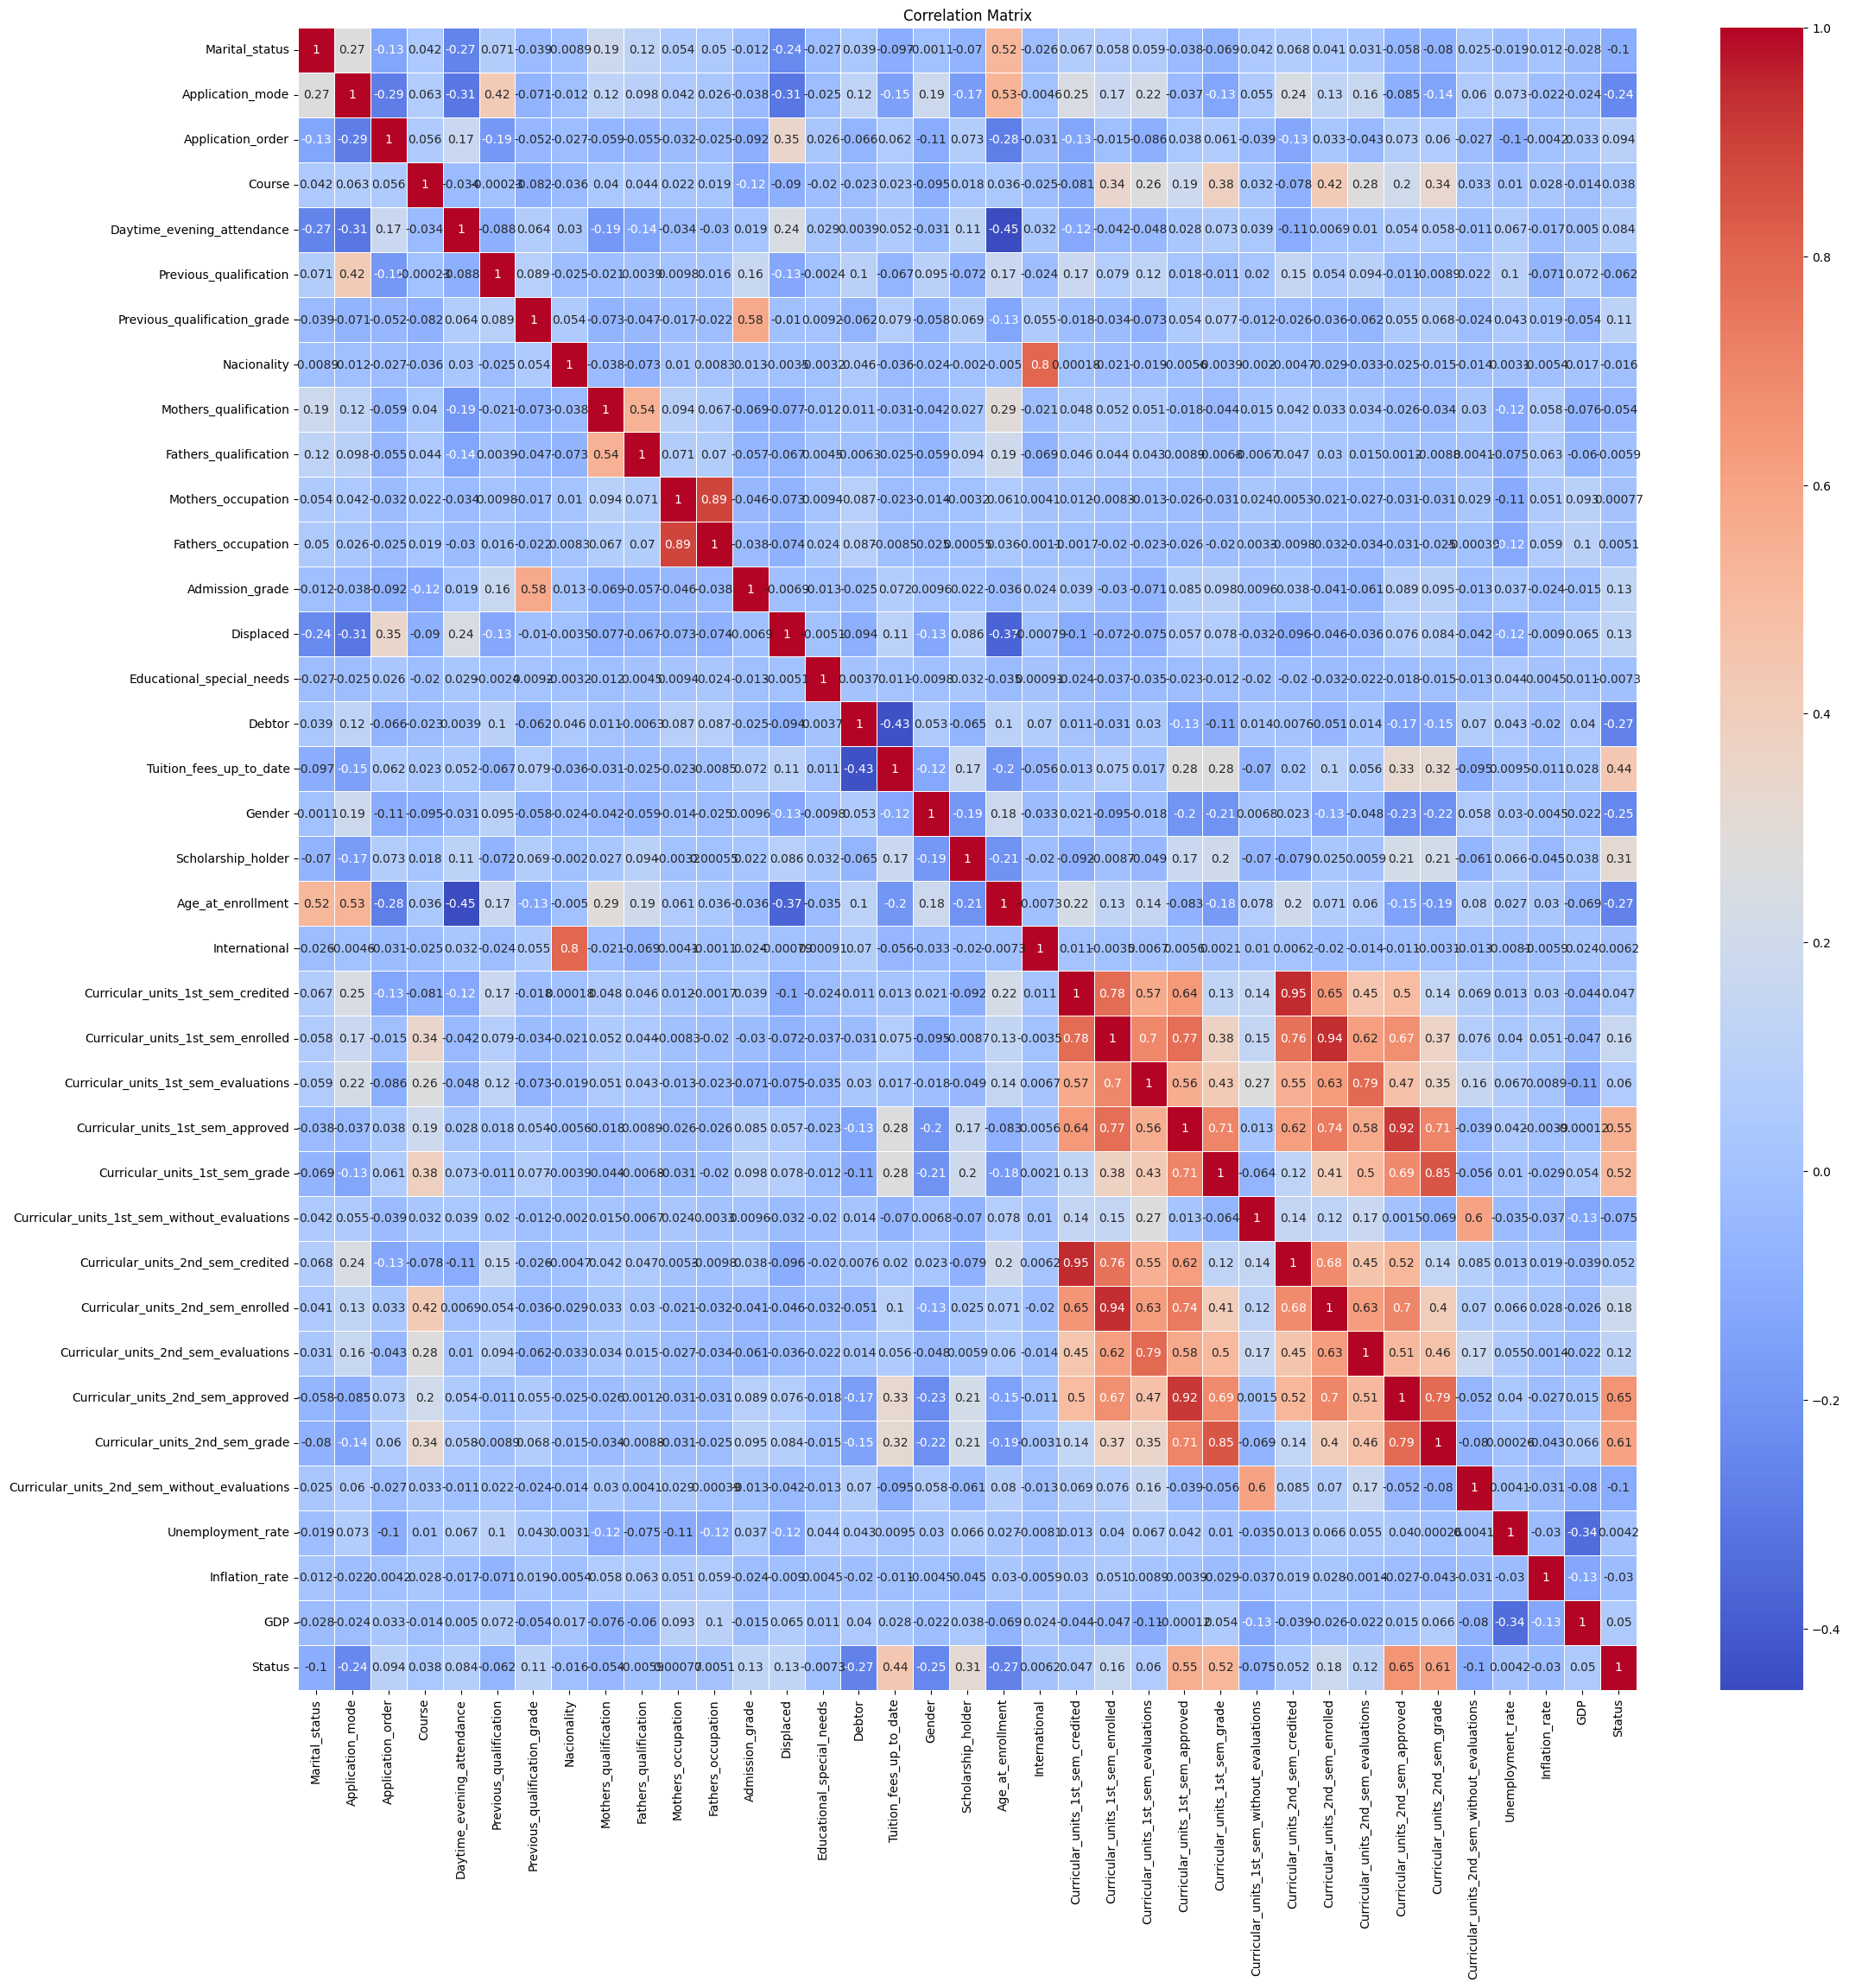

In [17]:
plt.figure(figsize=(25, 25))
sns.heatmap(students_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
students_df.corr()['Status']

,Status
Marital_status,-0.100479
Application_mode,-0.244507
Application_order,0.094355
Course,0.038135
Daytime_evening_attendance,0.084496
Previous_qualification,-0.062323
Previous_qualification_grade,0.109464
Nacionality,-0.015516
Mothers_qualification,-0.053989
Fathers_qualification,-0.005865


In [19]:
students_df.drop(columns=['Marital_status',
                          'Application_mode',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Inflation_rate',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Unemployment_rate',
                          'GDP'
                          ], axis=1, inplace=True)
students_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_order                  3630 non-null   int64  
 1   Course                             3630 non-null   int64  
 2   Daytime_evening_attendance         3630 non-null   int64  
 3   Previous_qualification_grade       3630 non-null   float64
 4   Admission_grade                    3630 non-null   float64
 5   Displaced                          3630 non-null   int64  
 6   Debtor                             3630 non-null   int64  
 7   Tuition_fees_up_to_date            3630 non-null   int64  
 8   Gender                             3630 non-null   int64  
 9   Scholarship_holder                 3630 non-null   int64  
 10  Age_at_enrollment                  3630 non-null   int64  
 11  Curricular_units_1st_sem_credited  3630 non-null   int64  
 1

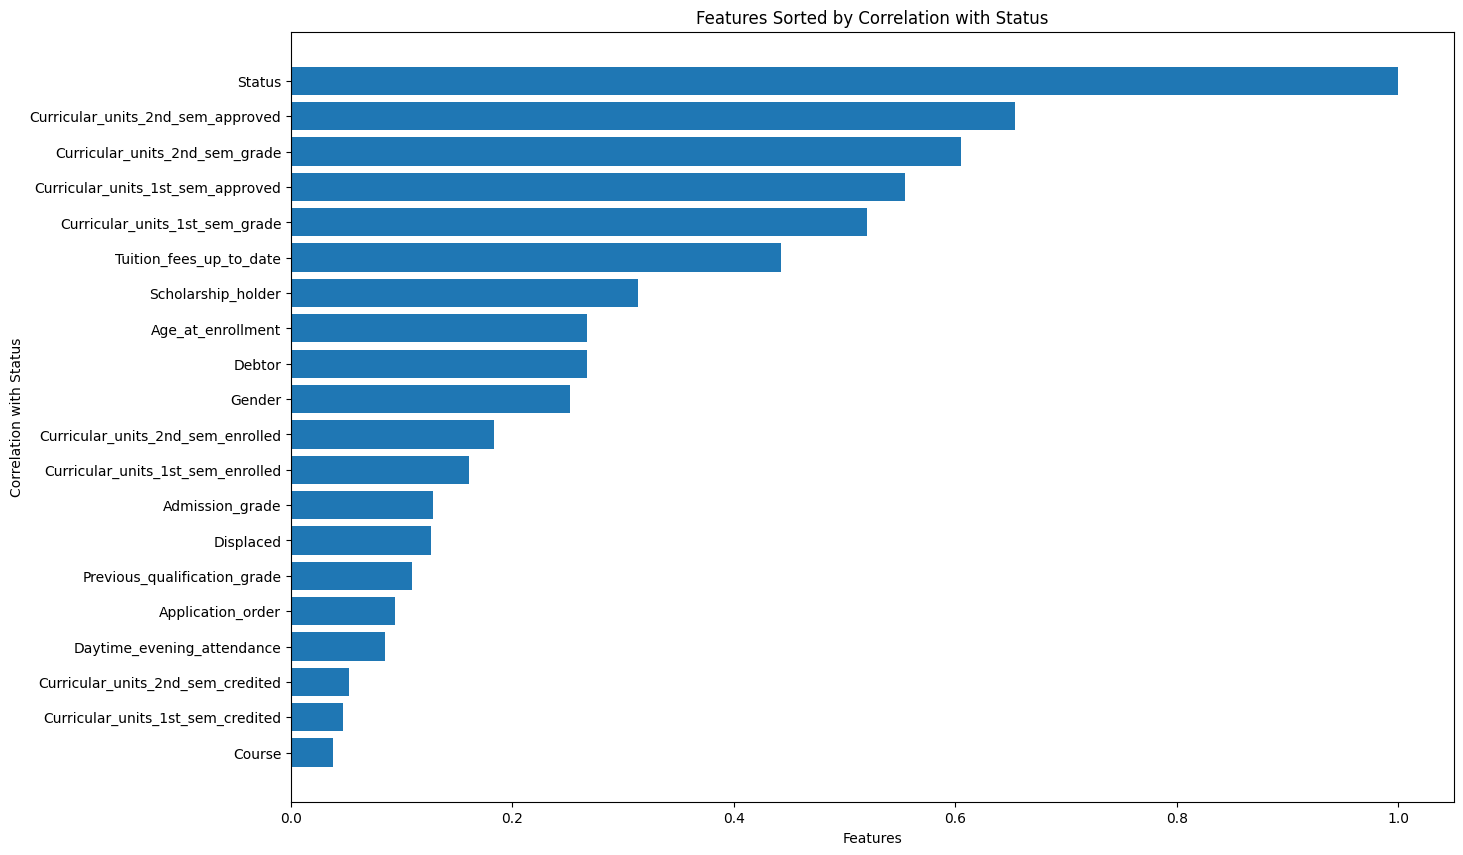

In [20]:
correlations = students_df.corr()['Status']
sorted_corr = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.barh(sorted_corr.index, sorted_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.gca().invert_yaxis()
plt.show()

In [21]:
students_df['Gender'] = students_df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
students_df['Displaced'] = students_df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
students_df['Debtor'] = students_df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
students_df['Scholarship_holder'] = students_df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
students_df['Tuition_fees_up_to_date'] = students_df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
students_df['Daytime_evening_attendance'] = students_df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
students_df['Status'] = students_df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})


### Status by Displaced

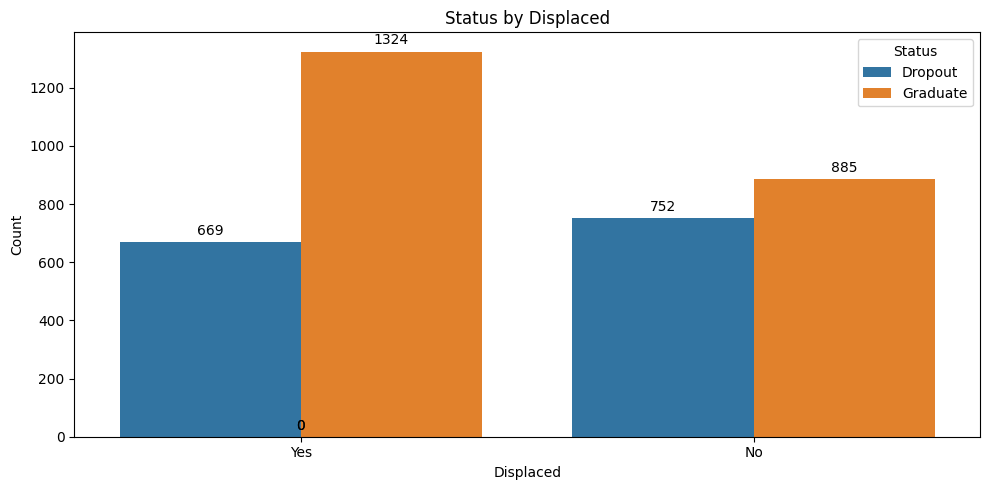

In [22]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Displaced', hue='Status', data=students_df)
plt.title('Status by Displaced')
plt.xlabel('Displaced')
plt.ylabel('Count')

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

### Status by Scholarshio Holder

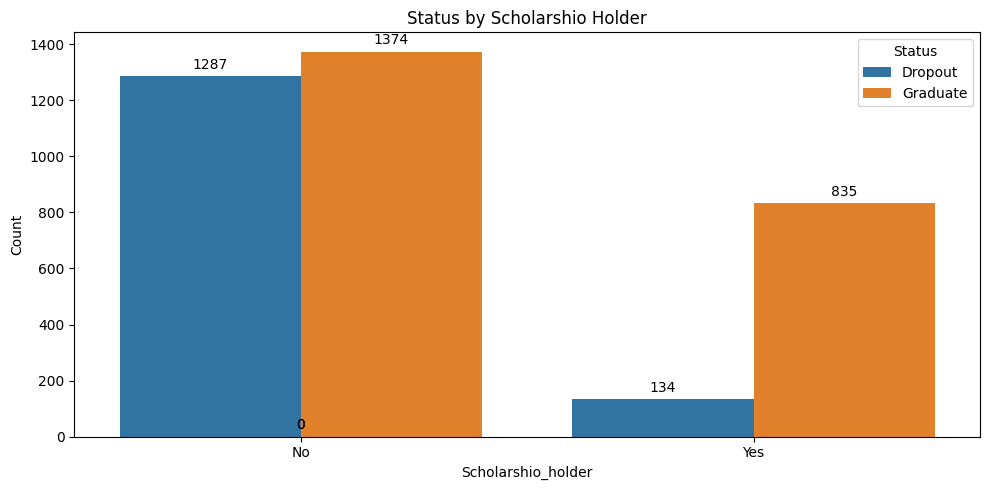

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Scholarship_holder', hue='Status', data=students_df)
plt.title('Status by Scholarshio Holder')
plt.xlabel('Scholarshio_holder')
plt.ylabel('Count')

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

### Status by Tuition Fees Up to Date

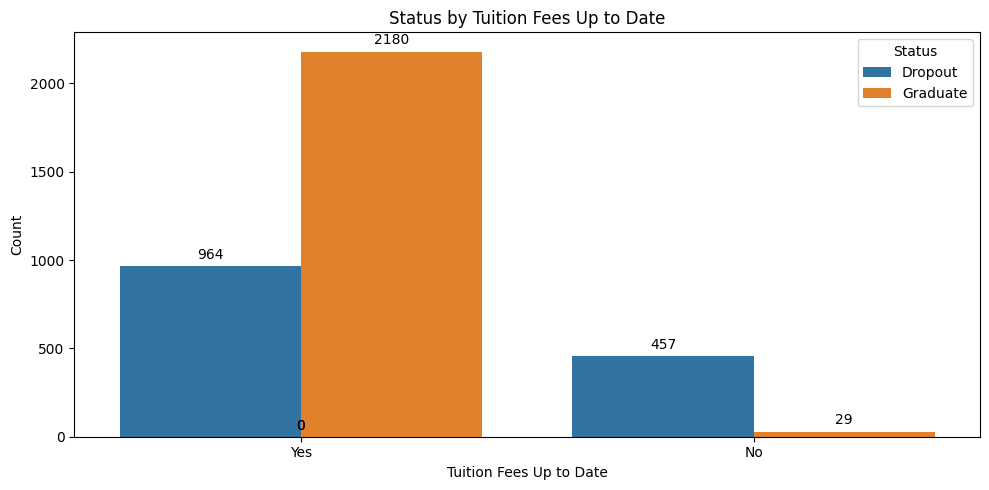

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=students_df)
plt.title('Status by Tuition Fees Up to Date')
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Count')

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

### Status by Daytime Evening Attendance

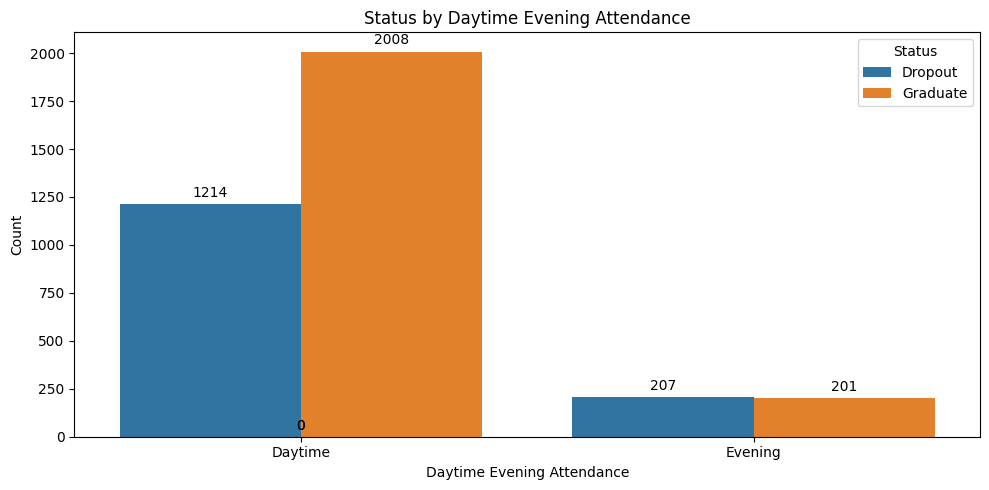

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Daytime_evening_attendance', hue='Status', data=students_df)
plt.title('Status by Daytime Evening Attendance')
plt.xlabel('Daytime Evening Attendance')
plt.ylabel('Count')

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

In [26]:
students_df.to_csv('students_clean.csv', index=False)

In [27]:
!cp -f students_clean.csv /content/drive/MyDrive/PYTHON/IDCamp\ Data\ Science\ Expert/Submission\ 2/

## Data Preparation / Preprocessing

In [28]:
import os
import shutil

folder = "model"

if os.path.exists(folder):
    shutil.rmtree(folder)

os.makedirs(folder)


In [29]:
def model_encoders(features, encoder):
  for feature in features:
    joblib.dump(encoder, f"model/{feature}_encoder.joblib".format(feature))

features_to_encode = ['Displaced',
                      'Scholarship_holder',
                      'Tuition_fees_up_to_date',
                      'Daytime_evening_attendance',
                      'Gender',
                      'Debtor']

le = LabelEncoder()

for col in features_to_encode:
  students_df[col] = le.fit_transform(students_df[col])

model_encoders(features_to_encode, le)

In [30]:
def model_scalers(features, scaler):
  for feature in features:
    joblib.dump(scaler, f"model/{feature}_scaler.joblib".format(feature))

features_to_scale = ['Admission_grade',
                     'Previous_qualification_grade',
                     'Curricular_units_1st_sem_approved',
                     'Curricular_units_1st_sem_grade',
                     'Curricular_units_1st_sem_enrolled',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_2nd_sem_approved',
                     'Curricular_units_2nd_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_credited']

ss = StandardScaler()

for col in features_to_scale:
  scaled_feature = ss.fit_transform(students_df[[col]])
  scaled_feature = scaled_feature.reshape(-1, 1)
  students_df[col] = scaled_feature
  model_scalers([col], ss)

In [31]:
X = np.array(students_df.drop(['Status'], axis=1))
y = np.array(students_df['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(3630, 19)
(2904, 19)
(726, 19)


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
print(X_train.shape)
print(X_test.shape)

(3520, 19)
(726, 19)


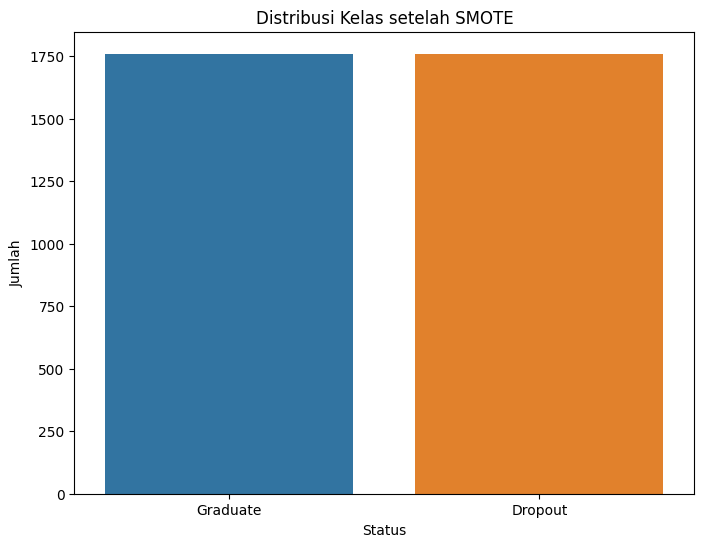

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, hue='Status', data=pd.DataFrame({'Status': y_train}))
plt.title('Distribusi Kelas setelah SMOTE')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(ticks=[0, 1], labels=['Graduate', 'Dropout'])
plt.show()

In [36]:
le = LabelEncoder()

le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

joblib.dump(le, 'model/target_encoder.joblib')

['model/target_encoder.joblib']

## Modeling

### Logistic Regression

In [37]:
# Inisialisasi model klasifikasi Logistic Regression
logistic_model = LogisticRegression()

# Definisikan grid hiperparameter untuk Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 150, 250, 400],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Inisialisasi GridSearchCV untuk Logistic Regression
logistic_grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=logistic_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Melatih model menggunakan GridSearchCV
logistic_model_best = logistic_grid_search.fit(X_train, y_train)

# Prediksi terhadap data uji
y_predicted_logistic = logistic_model_best.predict(X_test)

# Menampilkan parameter terbaik hasil pencarian
print("Best parameters:", logistic_model_best.best_params_)

# Menghitung dan menampilkan akurasi data uji
logistic_test_accuracy = accuracy_score(y_test, y_predicted_logistic)
print("LR Accuracy Score:", logistic_test_accuracy)

Best parameters: {'C': 0.1, 'max_iter': 150, 'solver': 'lbfgs', 'tol': 0.0001}
LR Accuracy Score: 0.9104683195592287


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [38]:
# Inisialisasi model Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()

# Definisikan grid hiperparameter untuk Decision Tree
decision_tree_param_grid = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV untuk Decision Tree
decision_tree_grid_search = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=decision_tree_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Melatih model menggunakan GridSearchCV
decision_tree_model_best = decision_tree_grid_search.fit(X_train, y_train)

# Prediksi terhadap data uji
y_predicted_dt = decision_tree_model_best.predict(X_test)

# Menampilkan parameter terbaik hasil pencarian
print("Best parameters:", decision_tree_model_best.best_params_)

# Menghitung dan menampilkan akurasi data uji
decision_tree_test_accuracy = accuracy_score(y_test, y_predicted_dt)
print("DT Accuracy Score:", decision_tree_test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
DT Accuracy Score: 0.8801652892561983


### Random Forest

In [39]:
# Inisialisasi model Random Forest Classifier
random_forest_model = RandomForestClassifier()

# Definisikan grid hiperparameter untuk Random Forest
random_forest_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Inisialisasi GridSearchCV untuk Random Forest
random_forest_grid_search = GridSearchCV(
    estimator=random_forest_model,
    param_grid=random_forest_param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Melatih model menggunakan GridSearchCV
random_forest_model_best = random_forest_grid_search.fit(X_train, y_train)

# Prediksi terhadap data uji
y_predicted_rf = random_forest_model_best.predict(X_test)

# Menampilkan parameter terbaik hasil pencarian
print("Best parameters:", random_forest_model_best.best_params_)

# Menghitung dan menampilkan akurasi data uji
random_forest_test_accuracy = accuracy_score(y_test, y_predicted_rf)
print("RF Accuracy Score:", random_forest_test_accuracy)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 400}
RF Accuracy Score: 0.90633608815427


## Evaluation

### Logistic Classifier

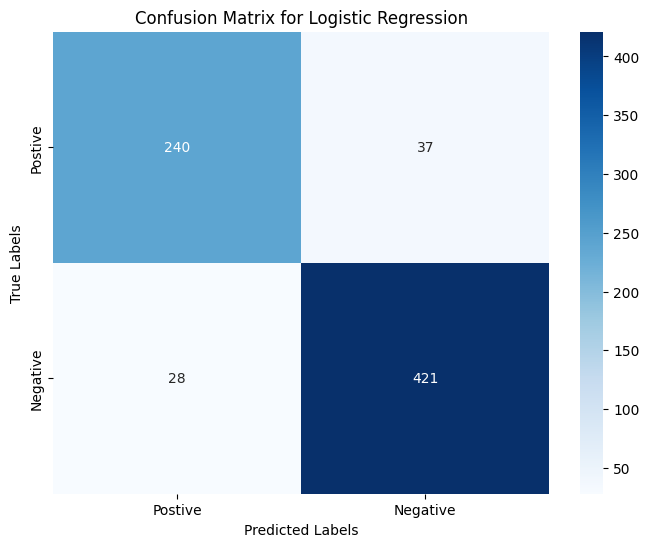

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       277
           1       0.92      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted_logistic)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Postive', 'Negative'],
            yticklabels=['Postive', 'Negative'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_predicted_logistic))

### Decision Tree Classifier

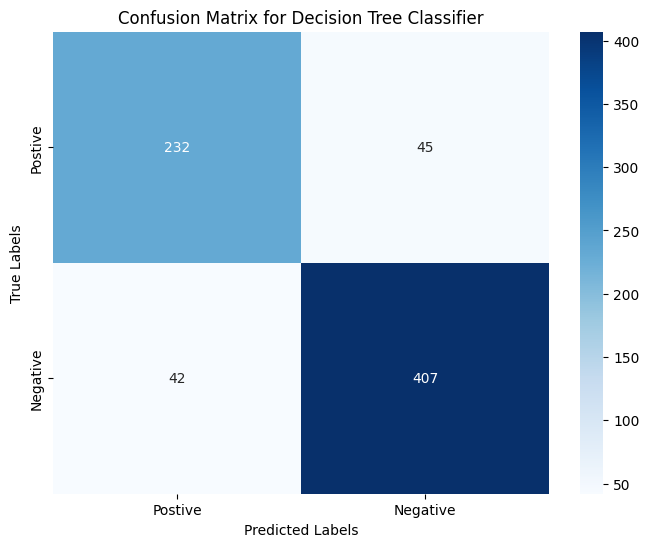

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       277
           1       0.90      0.91      0.90       449

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Postive', 'Negative'],
            yticklabels=['Postive', 'Negative'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_predicted_dt))


### Random Forest Classifier

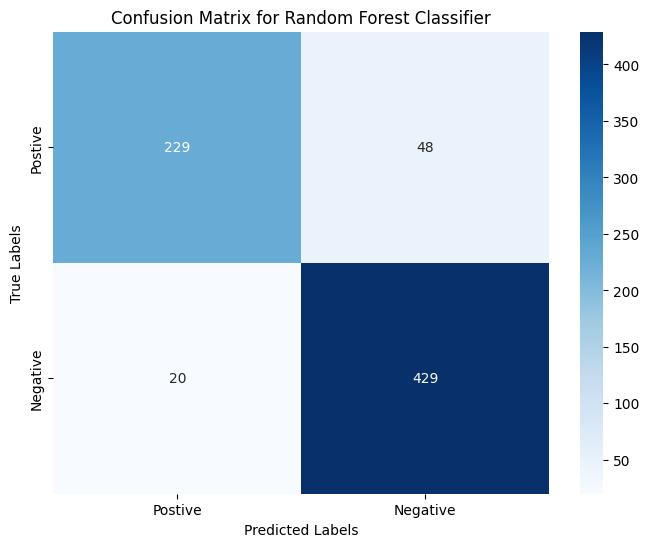

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       277
           1       0.90      0.96      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



In [42]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Postive', 'Negative'],
            yticklabels=['Postive', 'Negative'])
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report for more detailed evaluation
print(classification_report(y_test, y_predicted_rf))


## Deployment

In [43]:
joblib.dump(logistic_model_best, 'model/logistic_model.pkl')

['model/logistic_model.pkl']

In [44]:
!pip install session_info
import session_info

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.1 MB/s eta 0:00:00


In [45]:
session_info.show(write_req_file=True, req_file_name='requirements.txt')

In [46]:
!cat requirements.txt

google
imblearn==0.13.0
joblib==1.5.0
matplotlib==3.10.0
numpy==2.0.2
pandas==2.2.2
seaborn==0.13.2
session_info==v1.0.1
sklearn==1.6.1
IPython==7.34.0
jupyter_client==6.1.12
jupyter_core==5.7.2
notebook==6.5.7


In [47]:
!cp -f requirements.txt /content/drive/MyDrive/PYTHON/IDCamp\ Data\ Science\ Expert/Submission\ 2/